In [1]:
import sys, pathlib, time, os
sys.path.append("../scripts/")

import numpy as np
from matplotlib import pyplot as plt

from peaks_dirac import DiracPatches
from hist_dirac import DiracHistograms

/global/cfs/cdirs/des/shubh/.conda/envs/gnn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


nthreads = 256
ncores = 128
nthreads_per_core = 2
nthreads_available = 256
ncores_available = 128
MPI VERSION    : CRAY MPICH version 8.1.25.17 (ANL base 3.4a2)
MPI BUILD INFO : Sun Feb 26 15:15 2023 (git hash aecd99f)

I'm on perlmutter!
I'm on perlmutter!


In [2]:
dataset_name = "20231216dirac"
hists = DiracHistograms(dataset_name)
graphs = DiracPatches(dataset_name, [21.0, 86.], [0, 1, 2, 3])

loading labels
loading histograms


Preprocessing healpy
Preprocessed healpy loaded in 7.986058235168457 seconds


In [49]:
index = 12

print(graphs[index][0].y)
print(hists[index][1])

tensor([ 0.3543,  0.7202,  0.6686, -0.9711,  0.0433,  0.9650])
tensor([ 0.3543,  0.7202,  0.6686, -0.9711,  0.0433,  0.9650])


In [50]:
hists[index][0], len(hists[index][0]) / len(graphs[index])

(tensor([  95.,  196.,  449.,  867., 1292., 1723., 1759., 1590., 1264.,  762.,
          456.,  266.,  130.,   59.,   61.,  171.,  343.,  625.,  838., 1123.,
         1333., 1434., 1246.,  882.,  647.,  387.,  222.,   86.,  116.,  279.,
          606., 1040., 1384., 1654., 1675., 1429., 1070.,  712.,  405.,  239.,
          105.,   47.,   75.,  238.,  430.,  686., 1026., 1197., 1222., 1234.,
         1034.,  730.,  508.,  318.,  170.,   65.,   85.,  244.,  566.,  937.,
         1434., 1739., 1675., 1458., 1003.,  695.,  395.,  191.,   98.,   46.,
           36.,  105.,  261.,  464.,  683., 1098., 1314., 1357., 1194.,  908.,
          609.,  298.,  140.,   67.,  113.,  257.,  511.,  990., 1382., 1688.,
         1643., 1462., 1021.,  672.,  408.,  162.,  107.,   48.,   29.,  120.,
          220.,  507.,  834., 1196., 1342., 1256., 1121.,  794.,  533.,  271.,
          161.,   73.]),
 14.0)

In [51]:
ex = np.load('/global/cfs/cdirs/des/mgatti/pywph_results/peaks_data_extrema.npy',allow_pickle=True).item()
ex

{0: {8.2: [-0.005724020455536198, 0.0642035350201375],
  13.1: [-0.005473983507879784, 0.04034681658227351],
  21.0: [-0.007944637037979138, 0.023594694970193356],
  33.6: [-0.006440917792858995, 0.013996409073281186],
  54.0: [-0.004506723232599285, 0.008515820190494044],
  86.0: [-0.003265214573343414, 0.004925678285633677],
  138.0: [-0.002387719966181531, 0.003294231820755697],
  221.0: [-0.001617023909300562, 0.0018867537056234064]},
 1: {8.2: [-0.005876239528139547, 0.07116888363572715],
  13.1: [-0.00603726449210201, 0.0464307127768722],
  21.0: [-0.007982754034036022, 0.027059074402025377],
  33.6: [-0.006656345930856633, 0.015772267914700797],
  54.0: [-0.005356327465353619, 0.009644823252030803],
  86.0: [-0.003818377637457561, 0.006428013051483912],
  138.0: [-0.0028376100545378065, 0.004289281327281266],
  221.0: [-0.0019392202204584774, 0.0026005771946372353]},
 2: {8.2: [-0.006254984380113338, 0.07241755475115917],
  13.1: [-0.007125843589314709, 0.04709138745985702],
  2

In [52]:
bins = {}
for sm in [21.0, 86.0]:
    for t in range(4):
        bins[str(sm)+str(t)] = np.linspace(ex[t][sm][0],ex[t][sm][1],15)

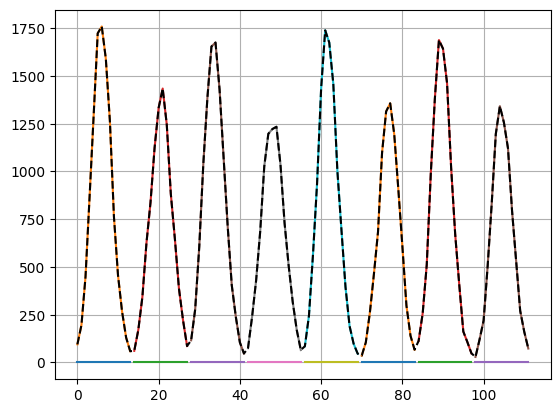

In [53]:
nbins=14
plt.figure()
for i in range(len(graphs[index])):
    if i % 2 == 0:
        sm = 21.0
    else:
        sm = 86.0
    plt.plot(np.arange(i*nbins, (i+1)*nbins),
            np.histogram(graphs[index][i].x.flatten(), bins=bins[str(sm)+str(i//2)])[0] - hists[index][0][i*nbins:(i+1)*nbins].numpy())
    plt.plot(np.arange(i*nbins, (i+1)*nbins),
            np.histogram(graphs[index][i].x.flatten(), bins=bins[str(sm)+str(i//2)])[0])
plt.plot(hists[index][0], label="histogram", ls='--', color='k')
plt.grid()
# plt.legend()
plt.show()
plt.close()

In [19]:
np.arange(8) // 2

array([0, 0, 1, 1, 2, 2, 3, 3])

In [16]:
np.arange(8) % 2

array([0, 1, 0, 1, 0, 1, 0, 1])

In [28]:
import torch
h = torch.load("/global/cfs/cdirs/des/shubh/graphs/graphs_weak_lensing/h.pt").cpu()
h2 = torch.load("/global/cfs/cdirs/des/shubh/graphs/graphs_weak_lensing/h2.pt").cpu()

In [29]:
h.shape

torch.Size([64, 8, 14, 2])

In [30]:
h[0, 0]

tensor([[  136.,     0.],
        [  144.,     0.],
        [  217.,     0.],
        [  260., 45709.],
        [  340.,   123.],
        [  399.,   123.],
        [  497.,   150.],
        [  522.,   147.],
        [  617.,   184.],
        [  630.,   202.],
        [  642.,   219.],
        [  663.,  3589.],
        [  609.,  4079.],
        [  528.,   535.]])

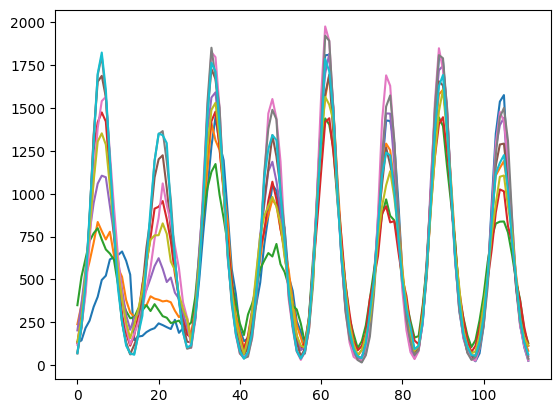

In [31]:
from matplotlib import pyplot as plt
plt.figure()
for ind in range(10):
    plt.plot(h[ind, :, :, 0].flatten())
plt.show()
plt.close()